In [1]:
import pandas as pd
import seaborn as sns
import scanpy as sc

In [2]:
split = 4
path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood_{split}.h5ad"
adata_ood = sc.read(path)
ood_conditions = adata_ood.obs["condition"].cat.categories

In [3]:
df = pd.read_csv(f"gse_score_{split}.csv")
df.drop(columns=["Unnamed: 0"])


,Alvespimycin+Pirarubicin,Cediranib+PCI-34051,Cediranib+PCI-34051_pred,Dacinostat+Danusertib,Dacinostat+Dasatinib,Dacinostat+PCI-34051,Givinostat+Carmofur,Givinostat+Cediranib,Givinostat+Crizotinib,Givinostat+Crizotinib_pred,...,SRT2104+Alvespimycin,SRT3025+Cediranib,control+Alvespimycin,control+Dacinostat,control+Dasatinib,control+Givinostat,control+Givinostat_pred,control+Panobinostat,control+SRT2104,control+SRT2104_pred
0,-0.717159,0.503558,-0.859475,-0.92813,-0.888514,-0.900943,-0.901589,-0.902059,-0.847441,-0.895693,...,-0.60848,0.362779,-0.652629,-0.923774,-0.891776,-0.877554,-0.840148,-0.854523,-0.284529,-0.829313


In [4]:
df = pd.read_csv(f"gse_score_{split}.csv")
df = df.drop(columns=["Unnamed: 0"])
df = df.T
df["score"] = df[0]
df["condition"] = df.index

In [5]:
def get_mode(x):
    if "pred" in x["condition"]:
        return "ood_pred"
    if x["condition"] in ood_conditions:
        return "ood_true"
    return "seen"

In [6]:
df["mode"] = df.apply(get_mode, axis=1)

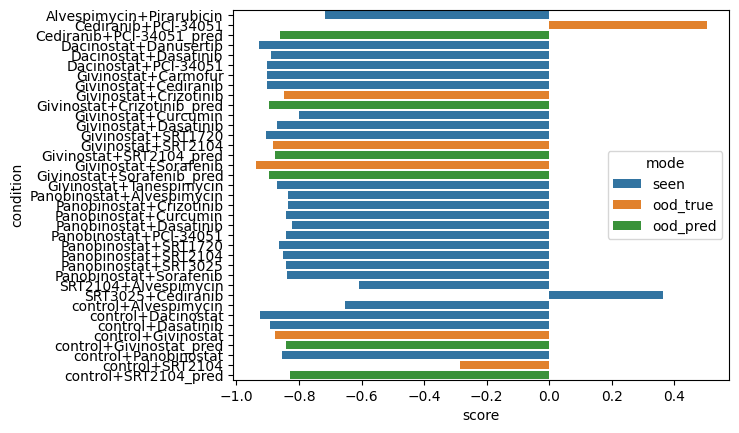

In [7]:
import matplotlib.pyplot as plt
sns.barplot(df, y="condition", x="score", hue="mode")
plt.xticks(rotation=0)
plt.show()


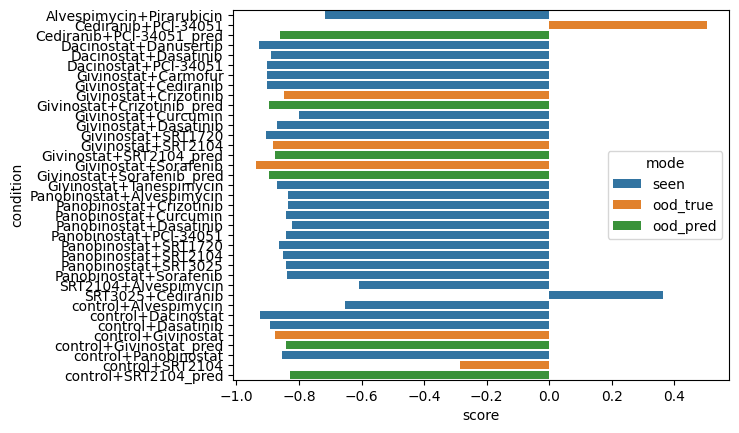

In [7]:
import matplotlib.pyplot as plt
sns.barplot(df, y="condition", x="score", hue="mode")
plt.xticks(rotation=0)
plt.show()
